In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Loading dataset
red = pd.read_csv("winequality-red.csv", sep=";")
white = pd.read_csv("winequality-white.csv", sep=";")

# Adding a column to distinguish wine type
red['type'] = 'red'
white['type'] = 'white'

# Combining into one dataset
df = pd.concat([red, white], ignore_index=True)

# Preview
print(df.shape)
df.head()


(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [16]:
# ============================================
# Inspecting the dataset
# ============================================

# Print column names
print("Columns:", list(df.columns))

# Data types and non-null counts
print("\nInfo:")
print(df.info())

# Missing values check
print("\nMissing values per column:")
print(df.isna().sum())

# Duplicate rows check
print("\nDuplicate rows:", df.duplicated().sum())


Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type', 'total_acidity', 'sugar_over_density']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non

In [9]:
# Summary stats
summary = df.describe(include="all").T
summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,NaN,NaN,NaN,7.215307,1.296434,3.8,6.4,7.0,7.7,15.9
volatile acidity,6497.0,NaN,NaN,NaN,0.339666,0.164636,0.08,0.23,0.29,0.4,1.58
citric acid,6497.0,NaN,NaN,NaN,0.318633,0.145318,0.0,0.25,0.31,0.39,1.66
residual sugar,6497.0,NaN,NaN,NaN,5.443235,4.757804,0.6,1.8,3.0,8.1,65.8
chlorides,6497.0,NaN,NaN,NaN,0.056034,0.035034,0.009,0.038,0.047,0.065,0.611
free sulfur dioxide,6497.0,NaN,NaN,NaN,30.525319,17.7494,1.0,17.0,29.0,41.0,289.0
total sulfur dioxide,6497.0,NaN,NaN,NaN,115.744574,56.521855,6.0,77.0,118.0,156.0,440.0
density,6497.0,NaN,NaN,NaN,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,NaN,NaN,NaN,3.218501,0.160787,2.72,3.11,3.21,3.32,4.01
sulphates,6497.0,NaN,NaN,NaN,0.531268,0.148806,0.22,0.43,0.51,0.6,2.0


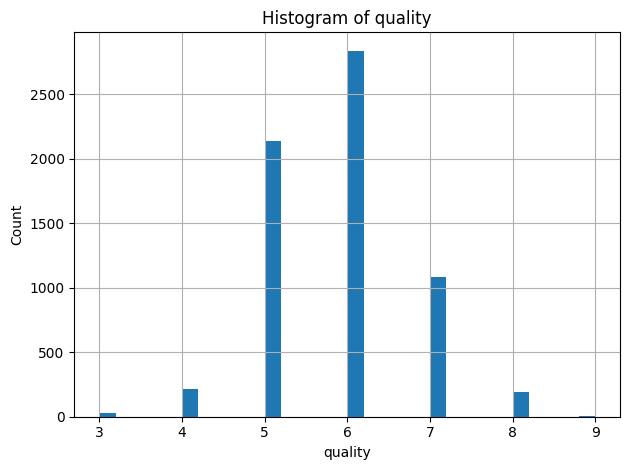

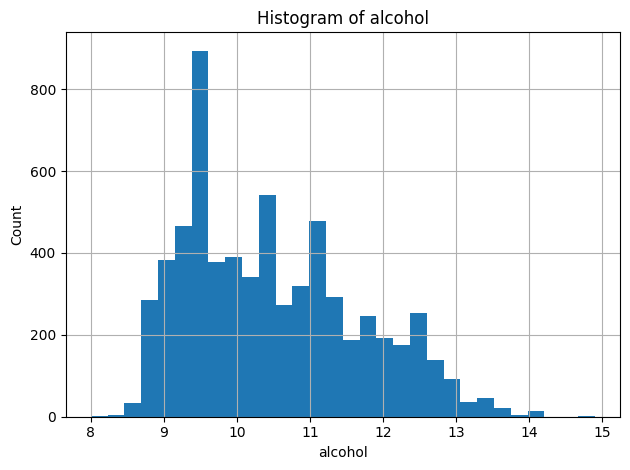

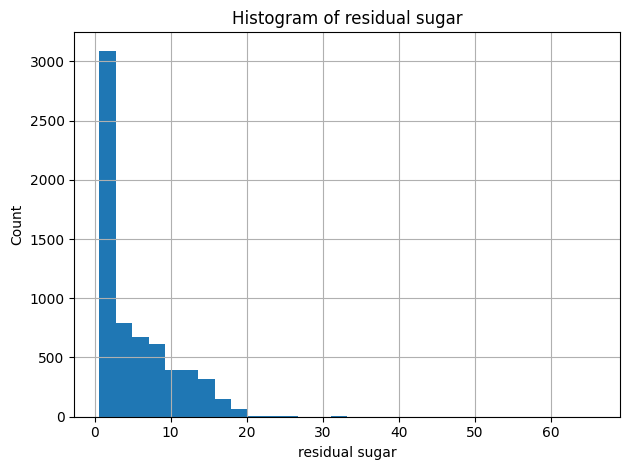

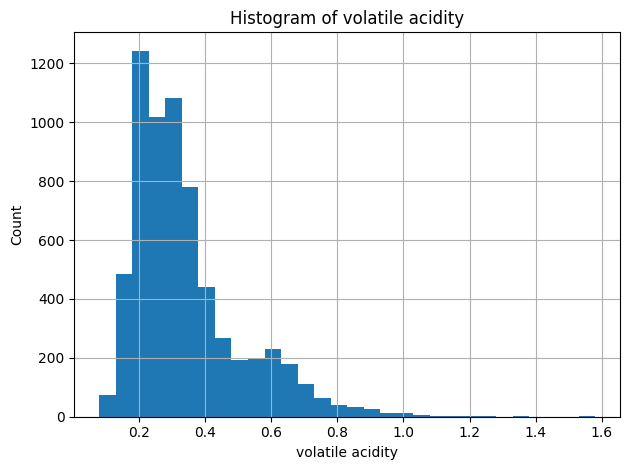

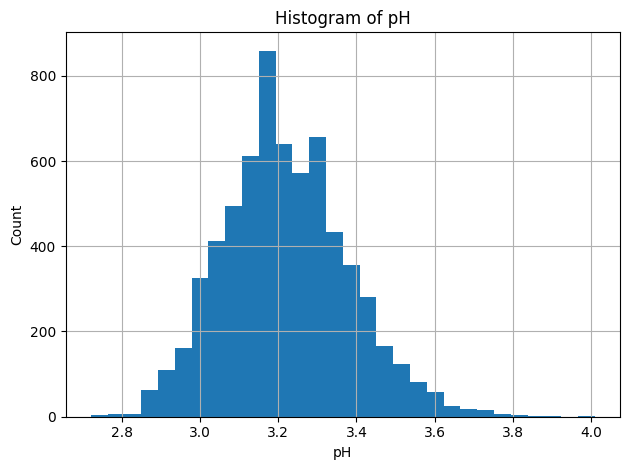

In [10]:
# ============================================
# Histograms for key variables
# ============================================

for col in ["quality","alcohol","residual sugar","volatile acidity","pH"]:
    if col in df.columns:
        plt.figure()
        df[col].hist(bins=30)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col); plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

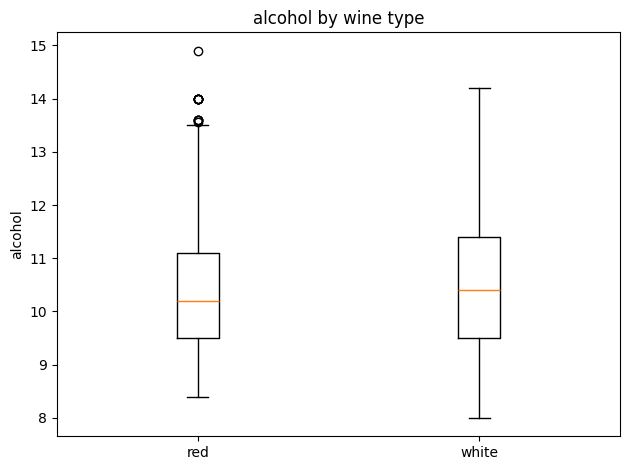

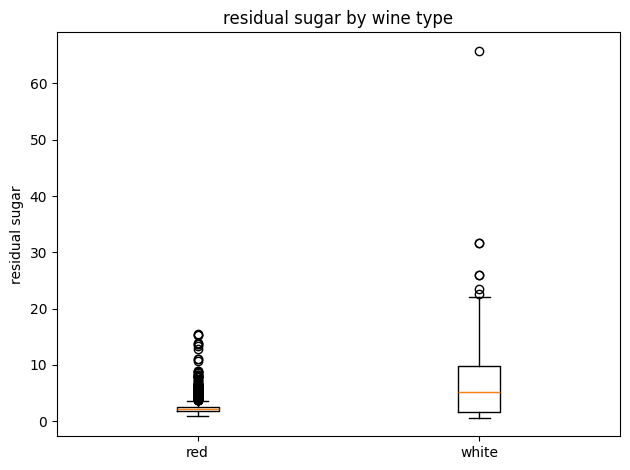

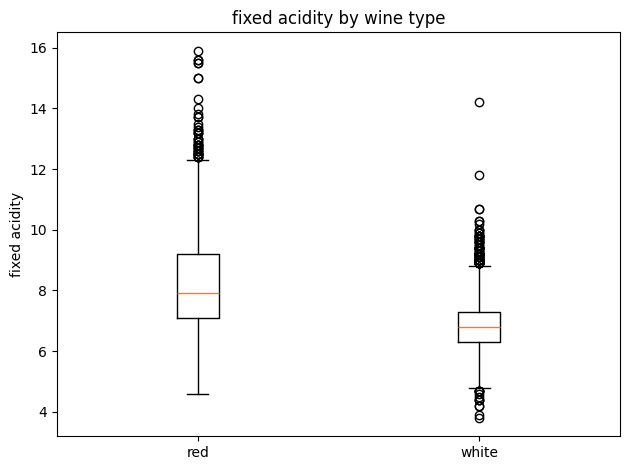

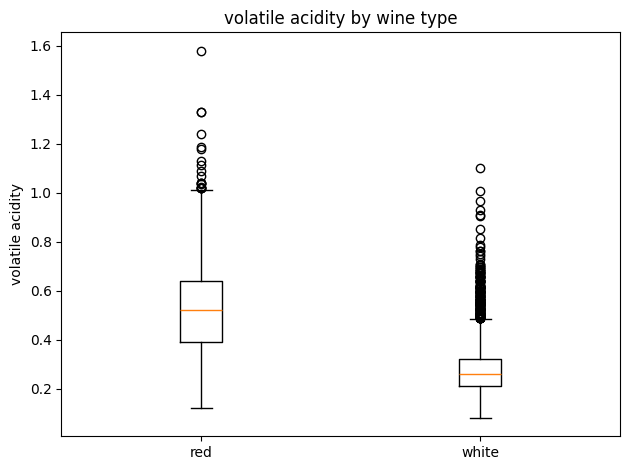

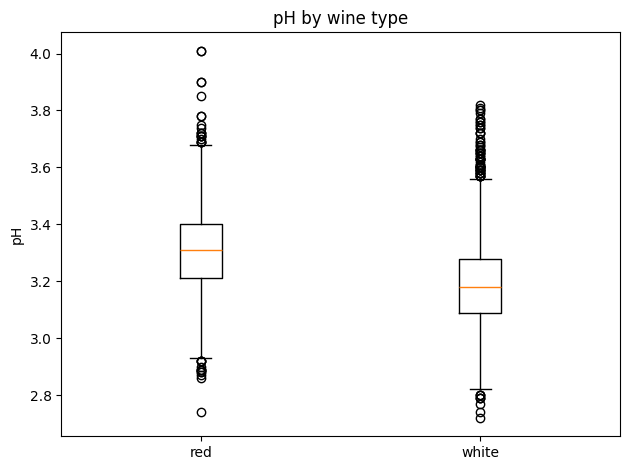

In [17]:
# ============================================
# Boxplots (Red vs White wines)
# ============================================

for col in ["alcohol", "residual sugar", "fixed acidity", "volatile acidity", "pH"]:
    if col in df.columns:
        plt.figure()
        
        # Compare red vs white wines for the selected variable
        plt.boxplot(
            [df.loc[df["type"]=="red", col].dropna(),
             df.loc[df["type"]=="white", col].dropna()],
            tick_labels=["red", "white"]   # updated param for matplotlib 3.9+
        )
        plt.title(f"{col} by wine type")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()


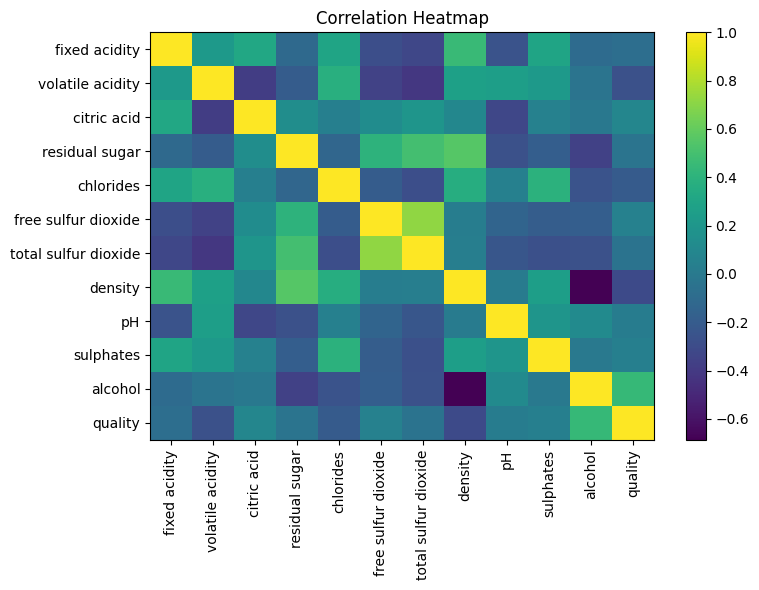

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,0.22,0.32,-0.11,0.30,-0.28,-0.33,0.46,-0.25,0.30,-0.10,-0.08
volatile acidity,0.22,1.00,-0.38,-0.20,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04,-0.27
citric acid,0.32,-0.38,1.00,0.14,0.04,0.13,0.20,0.10,-0.33,0.06,-0.01,0.09
residual sugar,-0.11,-0.20,0.14,1.00,-0.13,0.40,0.50,0.55,-0.27,-0.19,-0.36,-0.04
chlorides,0.30,0.38,0.04,-0.13,1.00,-0.20,-0.28,0.36,0.04,0.40,-0.26,-0.20
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.20,1.00,0.72,0.03,-0.15,-0.19,-0.18,0.06
total sulfur dioxide,-0.33,-0.41,0.20,0.50,-0.28,0.72,1.00,0.03,-0.24,-0.28,-0.27,-0.04
density,0.46,0.27,0.10,0.55,0.36,0.03,0.03,1.00,0.01,0.26,-0.69,-0.31
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1.00,0.19,0.12,0.02
sulphates,0.30,0.23,0.06,-0.19,0.40,-0.19,-0.28,0.26,0.19,1.00,-0.00,0.04


In [13]:
# ============================================
# Correlation heatmap
# ============================================

# Select only numeric columns
num_cols = df.select_dtypes(include=np.number).columns
corr = df[num_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect="auto", interpolation="nearest")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Display correlation values (rounded)
corr.round(2)


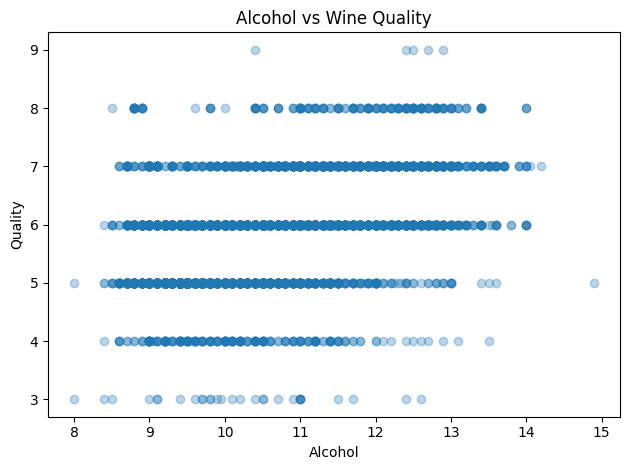

    type   quality
0    red  5.636023
1  white  5.877909


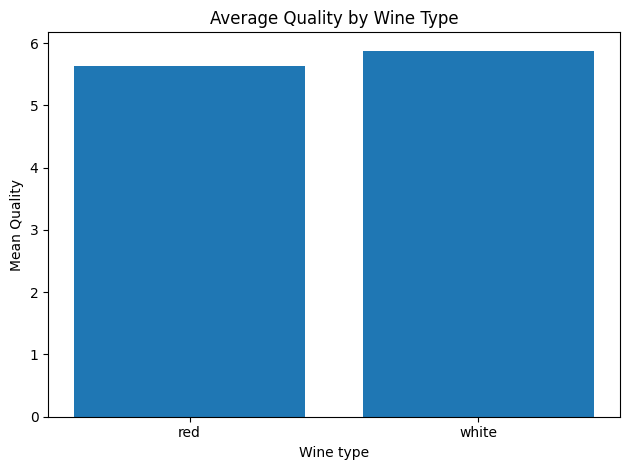

In [18]:
# ============================================
# Relationships with Quality
# ============================================

# Scatter plot: Alcohol vs Quality
plt.figure()
plt.scatter(df["alcohol"], df["quality"], alpha=0.3)
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Alcohol vs Wine Quality")
plt.tight_layout()
plt.show()

# Comparing average quality by wine type
avg_quality = df.groupby("type")["quality"].mean().reset_index()
print(avg_quality)

# Bar chart for average quality by type
plt.figure()
plt.bar(avg_quality["type"], avg_quality["quality"])
plt.title("Average Quality by Wine Type")
plt.xlabel("Wine type")
plt.ylabel("Mean Quality")
plt.tight_layout()
plt.show()

